In [1]:
"""
This is a boilerplate file for you to get started on MNIST dataset and run SVD.

This file has code to read labels and data from .gz files you can download from
http://yann.lecun.com/exdb/mnist/

Files will work if train-images-idx3-ubyte.gz file and
train-labels-idx1-ubyte.gz files are in the same directory as this
python file.
"""
from __future__ import print_function
import argparse
import gzip
import struct
import numpy as np
import matplotlib.pyplot as plt
from PCA import PCA 

In [2]:
with gzip.open("train-images-idx3-ubyte.gz", 'rb') as in_gzip:
    magic, num, rows, columns = struct.unpack('>IIII', in_gzip.read(16))
    all_data = [np.array(struct.unpack('>{}B'.format(rows * columns),
                                       in_gzip.read(rows * columns)))
                for _ in range(60000)]

In [3]:
with gzip.open("train-labels-idx1-ubyte.gz", 'rb') as in_gzip:
    magic, num = struct.unpack('>II', in_gzip.read(8))
    all_labels = struct.unpack('>60000B', in_gzip.read(60000))

In [15]:
pca = PCA(5)
pca.fit(all_data[:30000])

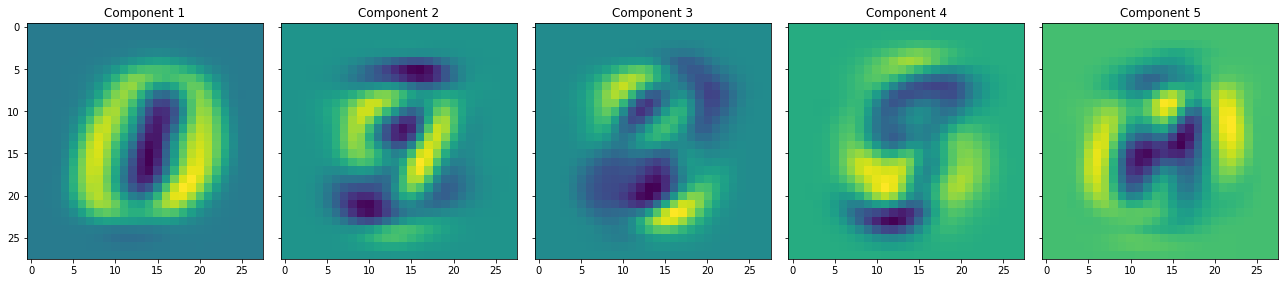

In [16]:
f, axarr = plt.subplots(1, 5, figsize=(18, 4), sharey=True)
for i in range(5):
    axarr[i].imshow(np.resize(pca.getBasis()[i],(28,28)))
    axarr[i].set_aspect('equal')
    axarr[i].set_title('Component {}'.format(i + 1))
plt.tight_layout()
name = 'hov'
plt.savefig('comps-{}.png'.format(name), dpi=320)